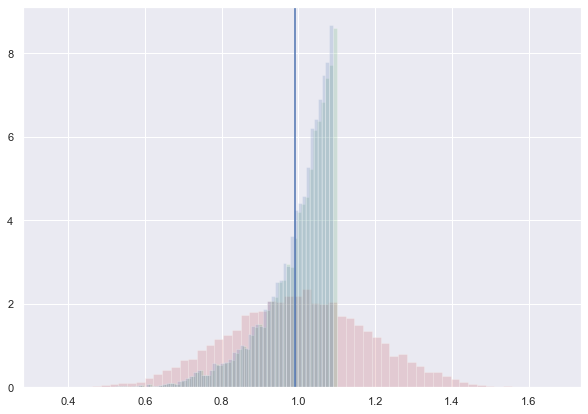


# Background

The problem, cash equity book (stocks), flow business.  oftne large volumes, which is why client trades with us. Mifid II, we cannot offload this risk immediately (then why would they trade with us), holding time around 1 day.
Trader can indicate interest in particular assets by posting IOIs.


Given a book/portfolio, what assets, and what weights do we use to hedge?
picture of efficient frontier...
    
1. Hedging with future
2. Hedging with stocks.

$\newcommand{\vect}[1]{\boldsymbol{#1}}$

case of two assets
At time $t$, you are given a portfolio $P$ of stock holdings

$P(t) = \sum_{i=1}^P {n_i S_i(t)} :=  \sum_{i=1}^P {w_i}$

which at time $t+1$ is worth

$P(t+1) = \sum_{i=1}^P {n_i S_i(t+1)} = \sum_{i=1}^P {n_i S_i(t)(1+R_i)} = \sum_{i=1}^P {w_i(1+R_i)}$

And Pnl is

$\Delta P = \sum_{i=1}^P {w_i}R_i = \sum_{i=1}^P {w_i}(e^{r_i}-1) \approx \sum_{i=1}^P {w_i}r_i = \vect{w}_P^T\vect{r}_P$


We can choose to buy a portfolio of hedges $H$ to offset movements in the portfolio

$H(t) = \sum_{i=p+1}^{p+h} {n_i S_i(t)} :=  \sum_{i=p+1}^{p+h} {w_i}$

$V(t) = P(t) + H(t) - H(t)$

$V(t+1) = P(t+1) + H(t+1) - H(t)$

$\Delta V = \Delta P + \Delta H = \vect{w}_P^T \vect{r}_P + \vect{w}_H^T \vect{r}_H$

We want $\Delta V$ is small as possible

So either we set $\Delta V=0$ such that

$\vect{w}_P^T \vect{r}_P = -\vect{w}_H^T \vect{r}_H$

and solve the OLS

$\vect{w}_P^T \vect{r}_P = -\vect{w}_H^T \vect{r}_H + \alpha + \epsilon$.

Or we minimize the variance of the PnL

$\mathbb{V}[\Delta V] = \vect{w}_P^T \Sigma_{PP}\vect{w}_P + 2\vect{w}_P^T \Sigma_{PH}\vect{w}_H + \vect{w}_H^T \Sigma_{HH}\vect{w}_H*$

With solution $\vect{w}_H^* = -(\Sigma_{HH})^{-1} \Sigma_{HP} \cdot \vect{w}_P$

and variance

$\sigma_{MVP}^2 = \mathbb{V}[\Delta V^*] = \vect{w}_P^T \left(\Sigma_{HH} - \Sigma_{HP}^T \Sigma_{HH}^{-1} \Sigma_{HP} \right)\vect{w}_P = \sigma_P^2 - \vect{w}_P^T \Sigma_{HP}^T \Sigma_{HH}^{-1} \Sigma_{HP}\vect{w}_P$

and the remaining relative variance

$\frac{\sigma_{MVP}^2}{\sigma_{P}^2} = 1 - \frac{\vect{w}_P^T \left( \Sigma_{HP}^T \Sigma_{HH}^{-1} \Sigma_{HP} \right) \vect{w}_P}{\sigma_P^2}$

Example:

#### Portfolio is one asset, one hedge $\Delta V = w_p R_p + w_h R_h$

$\Delta V=0$ => OLS problem: $w_P R_P = \alpha + (-w_2) R_H + \epsilon$

$w_H^* = - w_P\frac{\sigma_P}{\sigma_H} \rho$

$\frac{\sigma^2_{MVP}}{\sigma^2_{P}} =  1- \rho^2$, or vol remaining $\frac{\sigma_{MVP}}{\sigma_{P}} =  \sqrt{1- \rho^2}$


# Hedging
## Target
### MVP
### PCA
### Equal risk contr
### other...

# Shrinkage estimators
## James-stein, (compare to Ridge)
## Random matrix (Machenki-Patur)

# Covariance
## Dynamic estimation, Kalman etc.
## Cleaning estimation, shrinkage, clippage etc.



# 1 Heding Problem background
Assume given a portfolio P, and allowed hedges, and a static cov/corr
MVP given by ... or OLS
## 1.2 Simulate from Cov, est cov and calc MPC... show performance of var reduction. Compare to if we knew the cov already .. ah shit crap, sucks. So issue in cov estimation. How to improve?

# 2 Intro to cov estimation / cleaning
Assume a static true cov matrix.
## 2.1 Samples covariance, always best (MLE)?
Best with regards to what? Measure loss in MSE, show graphs of var-bias trade-off. MSE = Var(delt) + Bias
Actually, it might not be using MLE. Can we do better?
## 2.2. Shrinkage estimators, admissible
James-stein example. X ~N(theta, Sigma) which is p x p.Show simulation and p-value for MSE diff vs MLE.
MLE admissible for p<=2, inadmissible for p>2. Show shrinkage balls + cone from website in bookmarks.

So why is MLE best estimator for p<=2? What's so special about 2? In fact, is equivalent to the recurrense of random walk in p dimensions. show pic(?).
- Charles Stein, Inadmissibility of the Usual Estimator for the Mean of a Multivariate Normal Distribution.
- L. Brown (1971). Admissible estimators, recurrent diffusions, and insoluble boundary value problems. Ann. Math. Stat., vol. 42, no. 3, pp. 855–903.
- R. N. Bhattacharya (1978). Criteria for recurrence and existence of invariant measures for multidimensional diffusions. Ann. Prob., vol. 6, no. 4, 541–553.

Opened up research on other shrinkage estimators (i.e. Ridge L2, Lasso, Elastic Net etc etc....)
Show Ridge solution is of same form delta_hat = 1/(1+lambda)*X_hat. Good when low SNR.

## 2.3. (Random matrix theory) The problem with estimating cov/correlation matrices
Marhecnki-Pastur. Show my results. Eigenvalues spread out. clippage, shrinkage, thresholding.

## 2.4. Run MVP test using LW Wolf, Clippage, ..

## 2.5. Dynamic cov/corr, 

MVP, PCA, ERC, etc. see paper.
Kalman filter...



# Estimators, best in terms of MSE

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

theta = 1
nsamp = 10
nsim = 10000

def MSE(est):
    return (est - theta)**2

mse = np.empty((nsim, 3))
loc = np.empty((nsim, 3))
for i in range(nsim):
    X = np.random.uniform(0, theta, nsamp)
    est1 = 2*np.mean(X)
    est2 = (nsamp + 1)/nsamp * np.max(X)
    est3 = (nsamp + 2)/(nsamp + 1) * np.max(X)
    loc[i,0], loc[i,1], loc[i,2] = (est1, est2, est3)
    mse[i,0], mse[i,1], mse[i,2] = MSE(est1), MSE(est2), MSE(est3)
    
est = np.mean(mse, axis=0)
est3_muvar = ( nsamp*(nsamp+2)/(nsamp+1)**2*theta, 0)

plt.figure(figsize=(10,7))
plt.hist(loc[:,0], density=True, bins='auto', alpha=0.2, color='r')
plt.axvline(est3_muvar[0])
plt.hist(loc[:,1], density=True, bins='auto', alpha=0.2, color='g')
plt.hist(loc[:,2], density=True, bins='auto', alpha=0.2, color='b')
plt.show()


